<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/us_prod_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install torchvision
!pip install torchaudio
!pip install wordcloud
!pip install TextBlob
!pip install spacy
!pip install textstat
!pip install pyldavis
!pip install flair
!pip install transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import os
import nltk
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pyLDAvis
import collections
from nltk.stem import PorterStemmer
import gensim
import re
import pyLDAvis.gensim_models as gensimvis
nltk.download('punkt')
nltk.download('wordnet')
#from keybert import KeyBERT
import spacy
import plotly.express as px
import string
from nltk.tokenize import sent_tokenize
from flair.data import Sentence
from flair.nn import Classifier
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats.api as sms

pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
def get_sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

#sentiment_pipeline = pipeline("sentiment-analysis")
def polarity(text):
    return TextBlob(text).sentiment.polarity

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

'''
def sentiment(text):
    try:
        return sentiment_pipeline(subset)['label'],  sentiment_pipeline(subset)['score']
    except:
        -99, -99
'''

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-Zƒü√º≈üƒ±√∂√ßƒû√ú≈ûƒ∞√ñ√á]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

def plot_dist(df, col):
    sns.distplot(df[col], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

def get_sentiment_raw(review_text):
    sentence = Sentence(review_text)

    # load the NER tagger
    tagger = Classifier.load('sentiment')

    # run NER over sentence
    tagger.predict(sentence)

    return str(sentence)

def get_sentiment_val(review_text):
    sentence = Sentence(review_text)

    # load the NER tagger
    tagger = Classifier.load('sentiment')

    # run NER over sentence
    tagger.predict(sentence)

    return str(sentence).split(" ‚Üí ")[1].split(" ")[0]

def get_sentiment_score(review_text):
    sentence = Sentence(review_text)

    # load the NER tagger
    tagger = Classifier.load('sentiment')

    # run NER over sentence
    tagger.predict(sentence)

    return float(str(sentence).split(" ‚Üí ")[1].split(" ")[1].replace("(","").replace(")",""))


In [4]:
df_review = pd.read_csv("review.csv")
df_review['REVIEW_TEXT'] = df_review['REVIEW_TEXT'].apply(lambda x : str(x))
df_review['REVIEW_TEXT'] = df_review['REVIEW_TEXT'].apply(lambda x : x.strip())
df_review['REVIEW_TEXT_LEN'] = df_review['REVIEW_TEXT'].apply(lambda x : len(str(x)))
print(df_review.shape)
df_review.head()

(331271, 6)


BRAND                                        REVIEW_TEXT REGIONLANGUAGE  \
0  baseus  Product is really good, easy to use, great for...             EN   
1  baseus  Wish it was a little stronger, but it is actua...             EN   
2   shark  I‚Äôm obsessed With this vacuum!! I use it daily...             EN   
3  baseus  Used for one car, great for light cleaning and...             EN   
4  baseus  Whoever designed this is a genius. It‚Äôs qualit...             EN   

   PRODUCTRATING  PRODUCTREVIEWCOUNT  REVIEW_TEXT_LEN  
0            4.2               158.0               75  
1            4.2               158.0              501  
2            4.4                73.0              387  
3            4.2               158.0              171  
4            4.2               158.0              533

In [5]:
df_review = df_review[['BRAND', 'REVIEW_TEXT', 'REVIEW_TEXT_LEN', 'PRODUCTRATING']].drop_duplicates()

In [6]:
df_review.shape

(293775, 4)

In [7]:
df_review['REVIEW_TEXT'] = df_review["REVIEW_TEXT"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)
df_review['REVIEW_WORD_COUNT'] = df_review['REVIEW_TEXT'].apply(lambda x : len(str(x).split()))
df_review = df_review[df_review['REVIEW_WORD_COUNT'] > 1]
df_review['REVIEW_SENTENCE_COUNT'] = df_review['REVIEW_TEXT'].apply(lambda x : len(sent_tokenize(x)))
df_review['REVIEW_TEXT'] = df_review["REVIEW_TEXT"].apply(lambda x : remove_punct(x))
df_review['REVIEW_POLARITY'] = df_review["REVIEW_TEXT"].apply(lambda x : polarity(x))
df_review['REVIEW_SUBJECTIVITY'] = df_review["REVIEW_TEXT"].apply(lambda x : subjectivity(x))
df_review.head()

BRAND                                        REVIEW_TEXT  REVIEW_TEXT_LEN  \
0  baseus  Product is really good  easy to use  great for...               75   
1  baseus  Wish it was a little stronger  but it is actua...              501   
2   shark  I‚Äôm obsessed With this vacuum   I use it daily...              387   
3  baseus  Used for one car  great for light cleaning and...              171   
4  baseus  Whoever designed this is a genius  It‚Äôs qualit...              533   

   PRODUCTRATING  REVIEW_WORD_COUNT  REVIEW_SENTENCE_COUNT  REVIEW_POLARITY  \
0            4.2                 14                      1         0.644444   
1            4.2                103                      5         0.040104   
2            4.4                 80                      4         0.169630   
3            4.2                 32                      3         0.306667   
4            4.2                102                      7         0.100000   

   REVIEW_SUBJECTIVITY  
0             0.727778  
1             0.513542  
2             0.517037  
3             0.450000  
4             0.537500

In [8]:
df_review_count = df_review.groupby(['BRAND']).agg({"REVIEW_TEXT": np.size}).reset_index().sort_values(by = ['REVIEW_TEXT'] )
df_review_count.columns = ['BRAND', 'REVIEW_COUNT']
df_review_count.sort_values(by = ['REVIEW_COUNT'], ascending=False ).head(5)

BRAND  REVIEW_COUNT
8   black+decker         61116
7        bissell         39588
63       vaclife         28922
54         shark         24451
17    dirt devil         12201

In [9]:
top_5_brands = df_review_count.sort_values(by = ['REVIEW_COUNT'], ascending=False ).head(5)['BRAND'].values.tolist()
top_5_brands

['black+decker', 'bissell', 'vaclife', 'shark', 'dirt devil']

In [10]:
len(df_review[['BRAND']].drop_duplicates())

73

In [11]:
reviewcount_bins = [0, 500, 1000, 5000, 10000, 25000, 50000, 75000, 1000000]
groups = df_review_count.groupby(pd.cut(df_review_count.REVIEW_COUNT, reviewcount_bins))
groups.BRAND.count()

REVIEW_COUNT
(0, 500]             5
(500, 1000]         23
(1000, 5000]        37
(5000, 10000]        2
(10000, 25000]       3
(25000, 50000]       2
(50000, 75000]       1
(75000, 1000000]     0
Name: BRAND, dtype: int64

In [12]:
df_review_stats = df_review.groupby(['BRAND']).agg({"PRODUCTRATING": [np.mean, np.std, np.size]}).reset_index()
df_review_stats.columns = ['brand', 'avg_rating', 'rating_std', 'rating_count']
df_review_stats

brand  avg_rating  rating_std  rating_count
0            absob    4.104030    0.169670           670
1   amazon renewed    4.233805    0.269885          1841
2           aonesy    4.255966    0.216452           813
3      as awesling    4.300000    0.000000          1451
4           auloea    4.061607    0.138542           448
..             ...         ...         ...           ...
68           whall    4.378586    0.306319          1896
69            worx    4.452365    0.049972           909
70          xiaomi    4.227500    0.204336          1240
71           xrexs    4.261232    0.068034           552
72         zesgood    4.106609    0.024852          1498

[73 rows x 4 columns]

In [13]:
df_top5_review_count = df_review_count.sort_values(by = ['REVIEW_COUNT'], ascending=False ).head(5)
df_top5_review_count

BRAND  REVIEW_COUNT
8   black+decker         61116
7        bissell         39588
63       vaclife         28922
54         shark         24451
17    dirt devil         12201

In [14]:
df_top5 = df_review[df_review.BRAND.isin(top_5_brands)]
df_top5.head()

BRAND                                        REVIEW_TEXT  \
2          shark  I‚Äôm obsessed With this vacuum   I use it daily...   
5          shark  Battery life I short   but that s my only grip...   
90  black+decker  It works well but you have to clean it out aft...   
91         shark  So very disappointed in this shark product  Ex...   
92         shark  The product is decent although overpriced   It...   

    REVIEW_TEXT_LEN  PRODUCTRATING  REVIEW_WORD_COUNT  REVIEW_SENTENCE_COUNT  \
2               387            4.4                 80                      4   
5               258            4.4                 49                      4   
90              164            4.3                 35                      2   
91              233            4.4                 42                      3   
92              118            4.4                 22                      2   

    REVIEW_POLARITY  REVIEW_SUBJECTIVITY  
2          0.169630             0.517037  
5          0.102778             0.644444  
90         0.128333             0.650000  
91         0.111667             0.675000  
92         0.022222             0.488889

In [15]:
df_top5 = pd.merge(df_top5_review_count, df_top5, how = 'inner', on = 'BRAND')
df_top5.head()

BRAND  REVIEW_COUNT  \
0  black+decker         61116   
1  black+decker         61116   
2  black+decker         61116   
3  black+decker         61116   
4  black+decker         61116   

                                         REVIEW_TEXT  REVIEW_TEXT_LEN  \
0  It works well but you have to clean it out aft...              164   
1  Aspira bastante bien el pelo de mi gato y de m...               56   
2  I love this product  It works perfectly for wh...              162   
3  El cable de luz muy corto no se queda estable ...               63   
4                            Lightweight easy to use               23   

   PRODUCTRATING  REVIEW_WORD_COUNT  REVIEW_SENTENCE_COUNT  REVIEW_POLARITY  \
0            4.3                 35                      2         0.128333   
1            4.1                 13                      2         0.000000   
2            4.1                 30                      5         0.500000   
3            4.1                 12                      2         0.000000   
4            4.1                  4                      1         0.433333   

   REVIEW_SUBJECTIVITY  
0             0.650000  
1             0.000000  
2             0.700000  
3             0.000000  
4             0.833333

In [16]:
product_rating_bins = [0, 1, 2, 3, 4, 5]
df_top5_bramd_product_rating_stats = pd.DataFrame()
for brand in top_5_brands:
    #print(brand)
    top5_brand_groups = df_top5[df_top5.BRAND == brand].groupby(pd.cut(df_top5[df_top5.BRAND == brand].PRODUCTRATING, product_rating_bins, include_lowest=True, right=True))
    #print(top5_brand_groups.BRAND.count())
    temp_df = pd.DataFrame(top5_brand_groups.BRAND.value_counts()).reset_index().pivot(index = 'BRAND', columns = 'PRODUCTRATING', values = 'count').reset_index()
    temp_df.columns = ['BRAND', 'GT_0_AND_LTQ_1', 'GT_1_AND_LTQ_2', 'GT_2_AND_LTQ_3', 'GT_3_AND_LTQ_4', 'GT_4_AND_LTQ_5']
    #temp_df = temp_df[['BRAND', 'PRODUCTRATING_BIN', 'BIN_COUNT']]
    total_review_count = df_top5[df_top5['BRAND'] == brand]['REVIEW_COUNT'].drop_duplicates().values.tolist()[0]

    temp_df['TOTAL_REVIEW_COUNT'] = df_top5[df_top5['BRAND'] == brand]['REVIEW_COUNT'].drop_duplicates().values.tolist()[0]
    temp_df['GT_0_AND_LTQ_1_PCT'] = np.round(temp_df[temp_df.BRAND == brand]['GT_0_AND_LTQ_1'] / temp_df[temp_df.BRAND == brand]['TOTAL_REVIEW_COUNT'], 4).values[0]
    temp_df['GT_1_AND_LTQ_2_PCT'] = np.round(temp_df[temp_df.BRAND == brand]['GT_1_AND_LTQ_2'] / temp_df[temp_df.BRAND == brand]['TOTAL_REVIEW_COUNT'], 4).values[0]
    temp_df['GT_2_AND_LTQ_3_PCT'] = np.round(temp_df[temp_df.BRAND == brand]['GT_2_AND_LTQ_3'] / temp_df[temp_df.BRAND == brand]['TOTAL_REVIEW_COUNT'], 4).values[0]
    temp_df['GT_3_AND_LTQ_4_PCT'] = np.round(temp_df[temp_df.BRAND == brand]['GT_3_AND_LTQ_4'] / temp_df[temp_df.BRAND == brand]['TOTAL_REVIEW_COUNT'], 4).values[0]
    temp_df['GT_4_AND_LTQ_5_PCT'] = np.round(temp_df[temp_df.BRAND == brand]['GT_4_AND_LTQ_5'] / temp_df[temp_df.BRAND == brand]['TOTAL_REVIEW_COUNT'], 4).values[0]

    temp_df['GT_0_AND_LTQ_1_PCT_CUMSUM'] = temp_df['GT_0_AND_LTQ_1_PCT']
    temp_df['GT_1_AND_LTQ_2_PCT_CUMSUM'] = temp_df['GT_1_AND_LTQ_2_PCT'] + temp_df['GT_0_AND_LTQ_1_PCT_CUMSUM']
    temp_df['GT_2_AND_LTQ_3_PCT_CUMSUM'] = temp_df['GT_2_AND_LTQ_3_PCT'] + temp_df['GT_1_AND_LTQ_2_PCT_CUMSUM']
    temp_df['GT_3_AND_LTQ_4_PCT_CUMSUM'] = temp_df['GT_3_AND_LTQ_4_PCT'] + temp_df['GT_2_AND_LTQ_3_PCT_CUMSUM']
    temp_df['GT_4_AND_LTQ_5_PCT_CUMSUM'] = temp_df['GT_4_AND_LTQ_5_PCT'] + temp_df['GT_3_AND_LTQ_4_PCT_CUMSUM']

    df_top5_bramd_product_rating_stats = pd.concat([df_top5_bramd_product_rating_stats, temp_df], ignore_index=True)
    temp_df = pd.DataFrame()

df_top5_bramd_product_rating_stats.head()

BRAND  GT_0_AND_LTQ_1  GT_1_AND_LTQ_2  GT_2_AND_LTQ_3  \
0  black+decker               0               0             219   
1       bissell               0               0               0   
2       vaclife               0               0               2   
3         shark               0               0               0   
4    dirt devil               0               0             420   

   GT_3_AND_LTQ_4  GT_4_AND_LTQ_5  TOTAL_REVIEW_COUNT  GT_0_AND_LTQ_1_PCT  \
0            7309           53566               61116                 0.0   
1               0           39588               39588                 0.0   
2             325           28595               28922                 0.0   
3             177           24259               24451                 0.0   
4            4431            7350               12201                 0.0   

   GT_1_AND_LTQ_2_PCT  GT_2_AND_LTQ_3_PCT  GT_3_AND_LTQ_4_PCT  \
0                 0.0              0.0036              0.1196   
1                 0.0              0.0000              0.0000   
2                 0.0              0.0001              0.0112   
3                 0.0              0.0000              0.0072   
4                 0.0              0.0344              0.3632   

   GT_4_AND_LTQ_5_PCT  GT_0_AND_LTQ_1_PCT_CUMSUM  GT_1_AND_LTQ_2_PCT_CUMSUM  \
0              0.8765                        0.0                        0.0   
1              1.0000                        0.0                        0.0   
2              0.9887                        0.0                        0.0   
3              0.9921                        0.0                        0.0   
4              0.6024                        0.0                        0.0   

   GT_2_AND_LTQ_3_PCT_CUMSUM  GT_3_AND_LTQ_4_PCT_CUMSUM  \
0                     0.0036                     0.1232   
1                     0.0000                     0.0000   
2                     0.0001                     0.0113   
3                     0.0000                     0.0072   
4                     0.0344                     0.3976   

   GT_4_AND_LTQ_5_PCT_CUMSUM  
0                     0.9997  
1                     1.0000  
2                     1.0000  
3                     0.9993  
4                     1.0000

In [17]:
rating_list = list(pd.cut(df_top5.PRODUCTRATING, product_rating_bins, include_lowest=True, right=True, labels=['GT_0_AND_LTQ_1', 'GT_1_AND_LTQ_2', 'GT_2_AND_LTQ_3', 'GT_3_AND_LTQ_4', 'GT_4_AND_LTQ_5']))
df_top5['PRODUCTRATING_BIN'] = rating_list
df_top5.head()

BRAND  REVIEW_COUNT  \
0  black+decker         61116   
1  black+decker         61116   
2  black+decker         61116   
3  black+decker         61116   
4  black+decker         61116   

                                         REVIEW_TEXT  REVIEW_TEXT_LEN  \
0  It works well but you have to clean it out aft...              164   
1  Aspira bastante bien el pelo de mi gato y de m...               56   
2  I love this product  It works perfectly for wh...              162   
3  El cable de luz muy corto no se queda estable ...               63   
4                            Lightweight easy to use               23   

   PRODUCTRATING  REVIEW_WORD_COUNT  REVIEW_SENTENCE_COUNT  REVIEW_POLARITY  \
0            4.3                 35                      2         0.128333   
1            4.1                 13                      2         0.000000   
2            4.1                 30                      5         0.500000   
3            4.1                 12                      2         0.000000   
4            4.1                  4                      1         0.433333   

   REVIEW_SUBJECTIVITY PRODUCTRATING_BIN  
0             0.650000    GT_4_AND_LTQ_5  
1             0.000000    GT_4_AND_LTQ_5  
2             0.700000    GT_4_AND_LTQ_5  
3             0.000000    GT_4_AND_LTQ_5  
4             0.833333    GT_4_AND_LTQ_5

In [18]:
df_review_stats[df_review_stats.brand.isin(top_5_brands)]

brand  avg_rating  rating_std  rating_count
7        bissell    4.446835    0.142636         39588
8   black+decker    4.290583    0.303297         61116
17    dirt devil    4.024465    0.493552         12201
54         shark    4.472516    0.153798         24451
63       vaclife    4.268578    0.098100         28922

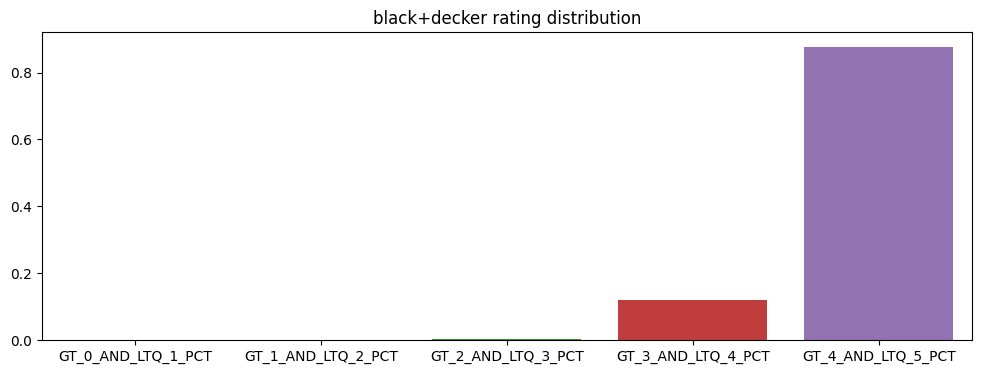

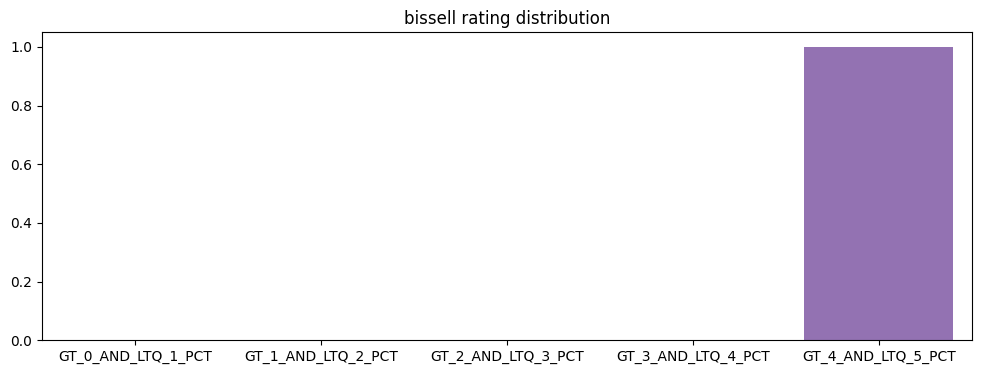

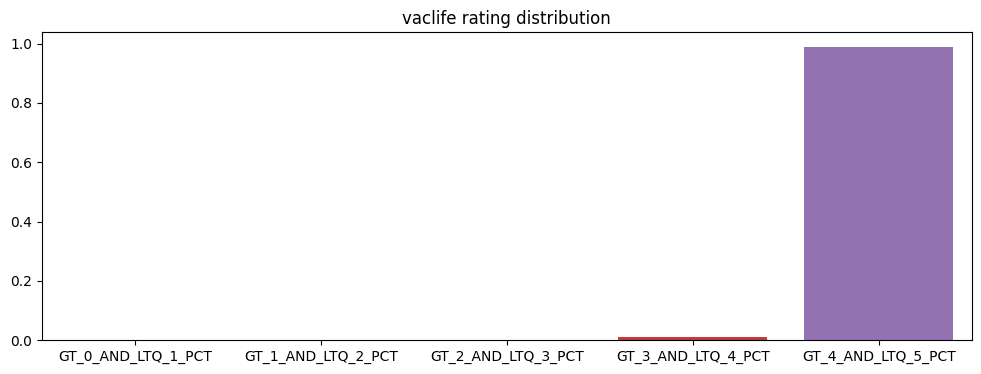

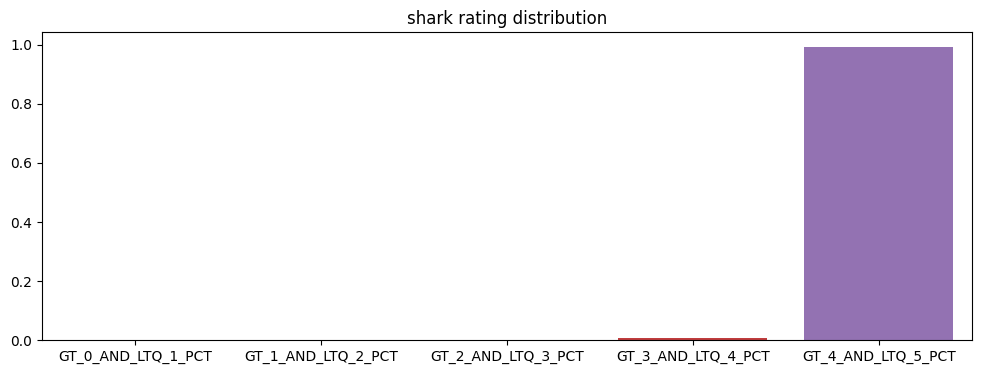

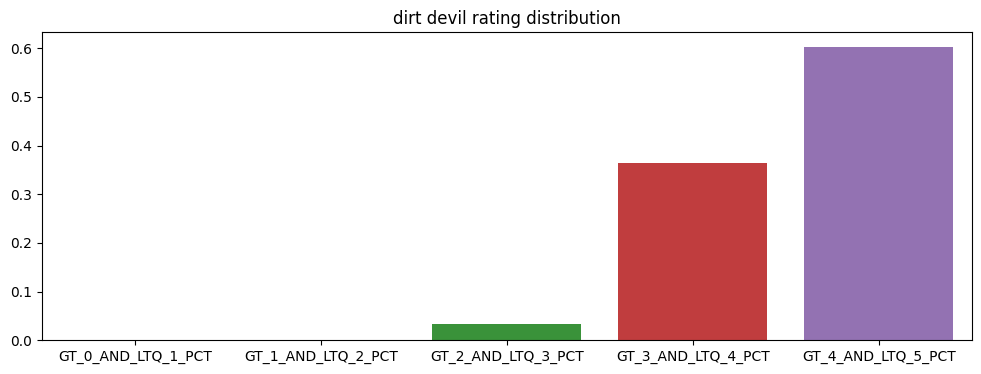

brand    ci  sample_size  est_mean  est_lower_limit  est_pper_limit
0  black+decker  0.95        10000  4.332993         4.327688        4.338299
1       bissell  0.95        10000  4.333167         4.327857        4.338477
2       vaclife  0.95        10000  4.330776         4.325349        4.336204
3         shark  0.95        10000  4.331206         4.325835        4.336577
4    dirt devil  0.95        10000  4.332513         4.327127        4.337900

In [38]:
estimate_list = []
sample_size_1 = 1000
sample_size_2 = 10000
sample_size_3 = 100000
ci = 0.95
ci_list = []
for brand in top_5_brands:
    test_df =  df_top5_bramd_product_rating_stats[(df_top5_bramd_product_rating_stats.BRAND == brand)].sample(frac=1).reset_index(drop=True)[['GT_0_AND_LTQ_1_PCT', 'GT_1_AND_LTQ_2_PCT', 'GT_2_AND_LTQ_3_PCT', 'GT_3_AND_LTQ_4_PCT', 'GT_4_AND_LTQ_5_PCT']]
    plt.figure(figsize = (12,4))
    plt.title(f"{brand} rating distribution")
    sns.barplot(test_df)
    plt.show(block = False)
    test_df = df_top5.sample(frac=1).reset_index(drop=True)[['PRODUCTRATING']].sample(n = sample_size_2, replace = True, random_state = 1000)
    #print(st.norm.interval(ci, loc=np.nanmean(test_df), scale=st.sem(test_df, nan_policy='omit')))
    est_mean = np.nanmean(test_df)
    lower_limit = st.t.interval(ci, len(test_df)-1, loc=np.nanmean(test_df), scale=st.sem(test_df, nan_policy='omit'))[0][0]
    upper_limit = st.t.interval(ci, len(test_df)-1, loc=np.nanmean(test_df), scale=st.sem(test_df, nan_policy='omit'))[1][0]
    #lower_limit = st.norm.interval(ci, loc=np.mean(test_df), scale=st.sem(test_df))[0][0]
    #upper_limit = st.norm.interval(ci, loc=np.mean(test_df), scale=st.sem(test_df))[1][0]
    ci_list.append((brand, ci, sample_size_2, np.nanmean(test_df), lower_limit, upper_limit))
df_ci = pd.DataFrame(ci_list, columns = ['brand', 'ci', 'sample_size', 'est_mean', 'est_lower_limit', 'est_pper_limit'])
df_ci

In [39]:
#sample_size = sample_size_2
pct_columns = ['GT_0_AND_LTQ_1_PCT', 'GT_1_AND_LTQ_2_PCT', 'GT_2_AND_LTQ_3_PCT', 'GT_3_AND_LTQ_4_PCT', 'GT_4_AND_LTQ_5_PCT']
for brand_idx, brand in enumerate(top_5_brands):#df_review['BRAND'].drop_duplicates().values.tolist():
    print(brand)
    brand_rating_dist = df_top5_bramd_product_rating_stats[df_top5_bramd_product_rating_stats.BRAND == brand][pct_columns].values[0]
    brand_ratig_bin_dist = np.round(brand_rating_dist * sample_size_1).astype(int)
    for i in range(sample_size_2):
        #print(brand, i)
        agg_temp_df = pd.DataFrame()
        temp_df = pd.DataFrame()
        for bin_idx, bin in enumerate(['GT_0_AND_LTQ_1', 'GT_1_AND_LTQ_2', 'GT_2_AND_LTQ_3', 'GT_3_AND_LTQ_4', 'GT_4_AND_LTQ_5']):
            temp_df = df_top5[(df_top5.BRAND == brand) & (df_top5.PRODUCTRATING_BIN == bin)].sample(frac=1).reset_index(drop=True)[['PRODUCTRATING', 'PRODUCTRATING_BIN']].sample(n = brand_ratig_bin_dist[bin_idx], replace = True, random_state = i + bin_idx + 1 + brand_idx + 1)
            agg_temp_df = pd.concat([agg_temp_df, temp_df], ignore_index=True)
        #print(len(agg_temp_df))
        estimate = agg_temp_df['PRODUCTRATING'].mean()
        estimate_list.append((brand, estimate))
df_estimate = pd.DataFrame(estimate_list)
df_estimate.columns = ['BRAND', 'ESTIMATED_SAMPLE_MEAN']
df_estimate

black+decker
bissell
vaclife
shark
dirt devil


BRAND  ESTIMATED_SAMPLE_MEAN
0      black+decker               4.293000
1      black+decker               4.289500
2      black+decker               4.290600
3      black+decker               4.283400
4      black+decker               4.280800
...             ...                    ...
49995    dirt devil               4.021622
49996    dirt devil               4.029830
49997    dirt devil               4.014014
49998    dirt devil               4.020120
49999    dirt devil               4.019920

[50000 rows x 2 columns]

In [40]:
df_estimate.groupby(['BRAND']).agg({"ESTIMATED_SAMPLE_MEAN" : [np.mean, np.std]})

ESTIMATED_SAMPLE_MEAN          
                              mean       std
BRAND                                       
bissell                   4.446895  0.004475
black+decker              4.289700  0.004407
dirt devil                4.024866  0.007667
shark                     4.472695  0.004597
vaclife                   4.268775  0.002792

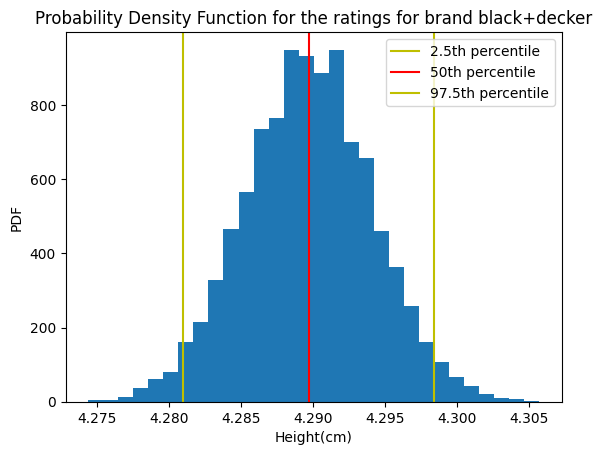

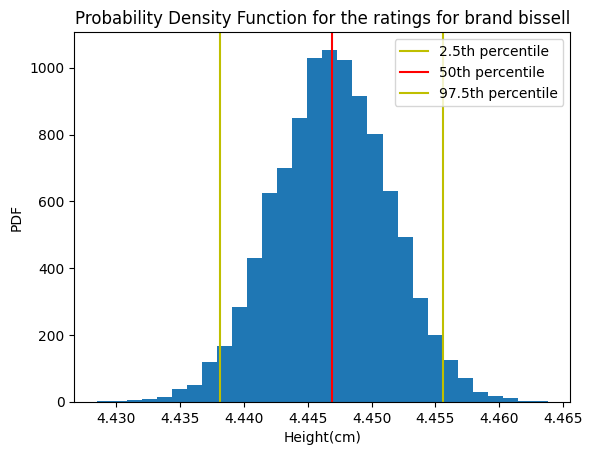

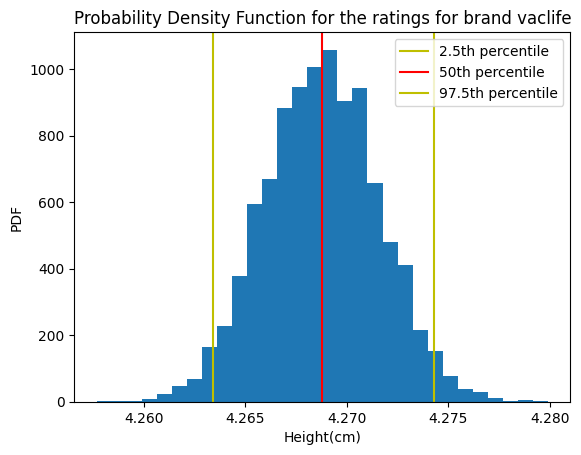

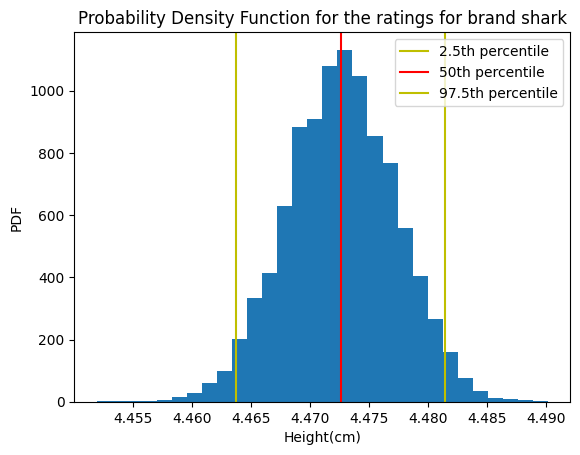

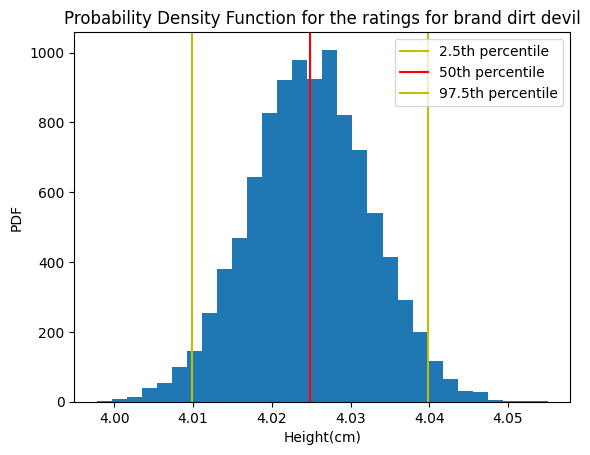

In [53]:
for brand in top_5_brands:
    plt.hist(df_estimate[df_estimate.BRAND == brand]['ESTIMATED_SAMPLE_MEAN'],bins=30)

    # Showing the related percentiles
    plt.axvline(x=np.percentile(df_estimate[df_estimate.BRAND == brand]['ESTIMATED_SAMPLE_MEAN'],[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
    plt.axvline(x=np.percentile(df_estimate[df_estimate.BRAND == brand]['ESTIMATED_SAMPLE_MEAN'],[50.0]), ymin=0, ymax=1,label='50th percentile',c='r')
    plt.axvline(x=np.percentile(df_estimate[df_estimate.BRAND == brand]['ESTIMATED_SAMPLE_MEAN'],[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='y')

    plt.xlabel("Height(cm)")
    plt.ylabel("PDF")
    plt.title(f"Probability Density Function for the ratings for brand {brand}")
    plt.legend()
    plt.show(block = False)

In [43]:
np.percentile(df_estimate[df_estimate.BRAND == brand]['ESTIMATED_SAMPLE_MEAN'],[2.5,97.5])

array([4.00980981, 4.03983984])

In [41]:
df_ci

brand    ci  sample_size  est_mean  est_lower_limit  est_pper_limit
0  black+decker  0.95        10000  4.332993         4.327688        4.338299
1       bissell  0.95        10000  4.333167         4.327857        4.338477
2       vaclife  0.95        10000  4.330776         4.325349        4.336204
3         shark  0.95        10000  4.331206         4.325835        4.336577
4    dirt devil  0.95        10000  4.332513         4.327127        4.337900

In [42]:
df_review_stats[df_review_stats.brand.isin(top_5_brands)]

brand  avg_rating  rating_std  rating_count
7        bissell    4.446835    0.142636         39588
8   black+decker    4.290583    0.303297         61116
17    dirt devil    4.024465    0.493552         12201
54         shark    4.472516    0.153798         24451
63       vaclife    4.268578    0.098100         28922

In [22]:
#brand_review_list = []

In [23]:
#tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

#model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [24]:
'''
df_review_sentiment = pd.DataFrame()
temp_df = pd.DataFrame()
for brand in top_5_brands:#df_review['BRAND'].drop_duplicates().values.tolist():
    temp_df = df_review[df_review.BRAND == brand][['BRAND','REVIEW_TEXT']]
    print(f"Brand: {brand}")
    print(f"Number of reviews: {len(temp_df)}")
    for i in list(list(range(0, len(temp_df), 1000))):
        print(i)
        temp_df['REVIEW_TEXT_SENTIMENT'] = temp_df.iloc[i : i + 1000, :]['REVIEW_TEXT'].apply(lambda x: get_sentiment_score(x[:512]))
        df_review_sentiment = pd.concat([df_review_sentiment, temp_df], ignore_index=True)
    temp_df = pd.DataFrame()
'''

'\ndf_review_sentiment = pd.DataFrame()\ntemp_df = pd.DataFrame()\nfor brand in top_5_brands:#df_review[\'BRAND\'].drop_duplicates().values.tolist():\n    temp_df = df_review[df_review.BRAND == brand][[\'BRAND\',\'REVIEW_TEXT\']]\n    print(f"Brand: {brand}")\n    print(f"Number of reviews: {len(temp_df)}")\n    for i in list(list(range(0, len(temp_df), 1000))):\n        print(i)\n        temp_df[\'REVIEW_TEXT_SENTIMENT\'] = temp_df.iloc[i : i + 1000, :][\'REVIEW_TEXT\'].apply(lambda x: get_sentiment_score(x[:512]))\n        df_review_sentiment = pd.concat([df_review_sentiment, temp_df], ignore_index=True)\n    temp_df = pd.DataFrame()\n'

In [25]:
#df_review_sentiment

In [26]:
#df_review['REVIEW_TEXT_SENTIMENT'] = df_review['REVIEW_TEXT'].apply(lambda x: sentiment_score(x[:512]))

In [27]:
'''
tokens = tokenizer.encode("good üòÑ", return_tensors='pt')
result = model(tokens)
int(torch.argmax(result.logits))+1
'''

'\ntokens = tokenizer.encode("good üòÑ", return_tensors=\'pt\')\nresult = model(tokens)\nint(torch.argmax(result.logits))+1\n'